In [ ]:
!pip install imgaug
!pip install files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for files: filename=files-1.1.1-py3-none-any.whl size=3671 sha256=6cec062121d72f8118dceaef35f8956d90e8f7b1a283515f95491dff9b02af20
  Stored in directory: /root/.cache/pip/wheels/2f/c3/9a/1705fa83402ed949d63209767985876ef4c5c78f8d53415bfb
Successfully built files


In [ ]:
import os
import cv2
import imgaug as ia
import numpy as np
from imgaug import augmenters as iaa
from files import *
from imgaug.augmentables.normalization import normalize_bounding_boxes as norbox
from google.colab.patches import cv2_imshow

ia.seed(1)


img = cv2.imread('/content/drive/MyDrive/NewTeam/최종프로젝트/YOLOv5/1122NEWDATA/sampledata/train/images/cTDaR_t10003_jpg.rf.2e37dda9cecff6f269b4211a572d6a73_180.jpg')
gt = np.loadtxt('/content/drive/MyDrive/NewTeam/최종프로젝트/YOLOv5/1122NEWDATA/sampledata/train/labels/cTDaR_t10003_jpg.rf.2e37dda9cecff6f269b4211a572d6a73_180.txt')
bbox_list = [] 
for i in range(len(gt)):
  if gt[0] == 'Table':
    x1 = float(gt[i][1])*416
    y1 = float(gt[i][2])*416
    w = float(gt[i][3])*416
    h = float(gt[i][4])*416
    newx = x1 - w/2
    newy = y1 - h/2
    newx2 = x1 + w/2
    newy2 = y1 + h/2
    x=ia.BoundingBox(x1 = newx, y1 = newy, x2 = newx2, y2 = newy2, label= 0)
    bbox_list.append(x)
  else:
    x1 = float(gt[i][1])*416
    y1 = float(gt[i][2])*416
    w = float(gt[i][3])*416
    h = float(gt[i][4])*416
    newx = x1 - w/2
    newy = y1 - h/2
    newx2 = x1 + w/2
    newy2 = y1 + h/2
    x=ia.BoundingBox(x1 = newx, y1 = newy, x2 = newx2, y2 = newy2, label= 0)
    bbox_list.append(x) 
bbs_list = ia.BoundingBoxesOnImage(bbox_list, shape=img.shape)

seq = iaa.Sequential([
    iaa.Affine(
            translate_px={"x": 0, "y": 0},
            scale=(1, 1),
            rotate=180
        )
])

image_aug, bbs_aug = seq(image=img, bounding_boxes=bbs_list)

image_before = bbs_list.draw_on_image(img, size=2)
image_after = bbs_aug.draw_on_image(image_aug, size=2, color=[0, 0, 255])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [ ]:
x.center_x/416,x.center_y/416,x.width/416,x.height/416

(0.5048076923076923,
 0.25240384615384615,
 0.5072115384615384,
 0.21634615384615385)

In [ ]:
gt

array([[1.        , 0.49639423, 0.69230769, 0.50961538, 0.29567308],
       [1.        , 0.50480769, 0.25240385, 0.50721154, 0.21634615]])

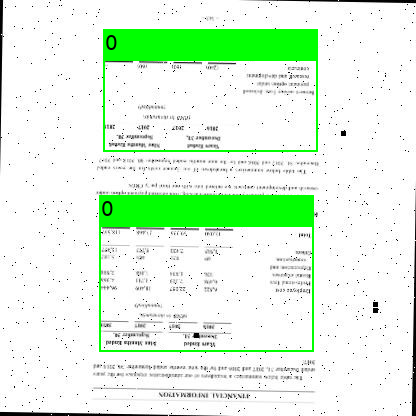

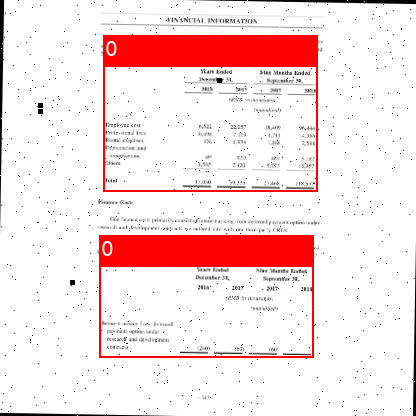

In [ ]:
cv2_imshow(image_before)
cv2_imshow(image_after)

In [ ]:
x.center_x/416,x.center_y/416,x.width/416,x.height/416

(0.6658653846153848,
 0.5264423076923077,
 0.2283653846153846,
 0.1201923076923077)